 # TP 6 : Chaines de Markov 3M246 JAFUNO Douba

# 1 Simulation d’une trajectoire

In [1]:
from random import random
from numpy import matrix
import matplotlib.pyplot as plt

In [2]:
# Question 1 

def markov(i, P):
    unif = random()
    somme = 0
    j = 0
    while somme<unif:
        somme += P[i,j]
        j += 1
    return j-1


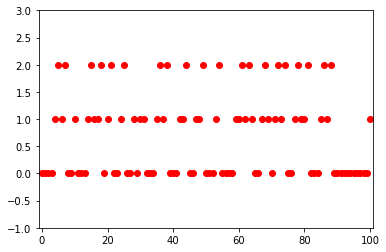

In [3]:

# Question 2 #
# Trajectoire d'une chaine de matrice de transition donnee.
P = matrix('2 1 0 ; 1 1 1 ; 1 2 0') / 3.
Xn = 0
traj = [Xn] #va contenir les positions successives de la chaine.
for i in range(100):
    Xn = markov(Xn, P)
    traj.append(Xn)
plt.plot(traj,'or')
plt.axis([-1,101,-1,3])
plt.show()



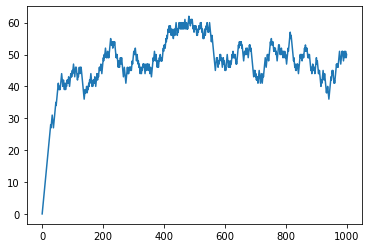

In [4]:

# Questiont 3 
# Trajectoire du modele d'Ehnrenfest

N = 100 # Nombre de particules
P = matrix(  [ [0.]*(N+1) ]*(N+1)  )
for i in range(N):
    P[i,i+1] = N-i
    P[i+1,i] = (i+1)
P /= float(N)
    
Xn = 0
traj = [Xn] # Liste qui va contenir la trajectoire
for i in range(1000):
    Xn = markov(Xn, P)
    traj.append(Xn)
plt.plot(traj)
plt.show()




# 2 Théorème ergodique et temps de retour

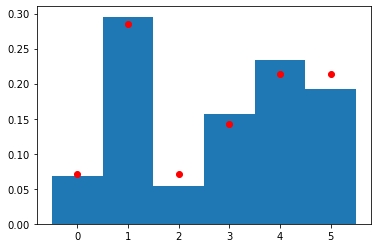

In [5]:

#Questions 4, 5 et 6 

# La matrice de transition de la marche sur le graphe.
P_gr = matrix('0 12 0 0 0 0 ; 3 0 0 3 3 3 ; 0 0 0 0 0 12 ; 0 6 0 0 6 0 ; 0 4 0 4 0 4 ; 0 4 4 0 4 0')/12.

N = 1400 # Nombre de pas de la trajectoire
Xn = 0
traj = [Xn] # La trajectoire
for i in range(N):
    Xn = markov(Xn, P_gr)
    traj.append(Xn)

# L'hist de la trajectoire
plt.hist(traj, density=True, bins=[-0.5+i for i in range(7)])

# La probabilite invariante, proportionnelle aux nombre d'aretes
# issues de chaque sommet.
plt.plot([1/14., 4/14., 1/14., 2/14., 3/14., 3/14.],'or')
plt.show()



In [6]:
#Question 7 

N = 1000 

# Le temps de retour moyen a chaque sommet (inverse des poids la probabilite invariante)
tps_moy_th = [14, 14/4., 14, 14/2., 14/3., 14/3.]

for i in range(6):
    temps_moy = 0
    for n in range(N):
        Xn = markov(i,P_gr)
        temps = 1
        while Xn != i:
            Xn = markov(Xn,P_gr)
            temps += 1
        temps_moy += temps/float(N)
    print("Temps de retour en %d : theorique %.2f  --  observe %.2f" % (i, tps_moy_th[i], temps_moy))
 

Temps de retour en 0 : theorique 14.00  --  observe 13.92
Temps de retour en 1 : theorique 3.50  --  observe 3.44
Temps de retour en 2 : theorique 14.00  --  observe 13.91
Temps de retour en 3 : theorique 7.00  --  observe 6.87
Temps de retour en 4 : theorique 4.67  --  observe 4.62
Temps de retour en 5 : theorique 4.67  --  observe 4.67


# 3 Convergence en loi

In [7]:
   
#Question 8

P = matrix('0 0.2 0 0.2 0.6 ; 0.3 0 0.7 0 0 ; 0 0.1 0 0.5 0.4 ; 0.4 0 0.6 0 0 ; 0.5 0 0.5 0 0')

print("La matrice P1^100 :")
print(P**100)
print("La matrice P1^101 :")
print(P**101)
print
print


P[4,0] = 0.3
P[4,1] = 0.2

print("La matrice P2^100 :")
print(P**100)
print("La matrice P2^101 :")
print(P**101)

La matrice P1^100 :
[[0.43434343 0.         0.56565657 0.         0.        ]
 [0.         0.14343434 0.         0.36969697 0.48686869]
 [0.43434343 0.         0.56565657 0.         0.        ]
 [0.         0.14343434 0.         0.36969697 0.48686869]
 [0.         0.14343434 0.         0.36969697 0.48686869]]
La matrice P1^101 :
[[0.         0.14343434 0.         0.36969697 0.48686869]
 [0.43434343 0.         0.56565657 0.         0.        ]
 [0.         0.14343434 0.         0.36969697 0.48686869]
 [0.43434343 0.         0.56565657 0.         0.        ]
 [0.43434343 0.         0.56565657 0.         0.        ]]
La matrice P2^100 :
[[0.17539164 0.11048562 0.30201099 0.18607871 0.22603305]
 [0.17538633 0.11048611 0.30200247 0.18608467 0.22604043]
 [0.17539191 0.11048559 0.30201142 0.18607841 0.22603267]
 [0.17538636 0.1104861  0.30200252 0.18608464 0.22604039]
 [0.17538758 0.11048599 0.30200447 0.18608327 0.22603869]]
La matrice P2^101 :
[[0.17538708 0.11048604 0.30200368 0.18608382 0